In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from linares_plot import *

%config InlineBackend.figure_format = 'svg'

In [59]:
dfa = pd.read_excel('simulations_far_4_3.xlsx')
dfb = pd.read_excel('simulations_far_4_3_2.xlsx')
df=pd.concat([dfa, dfb], ignore_index=True)


In [60]:
def remove_outlier_mult_columns(df_in, col_names):
    ### column names is a list of the columns to remove outliers
    outliers_booleans = []
    for col_name in col_names:        
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        #
        inf_outliers = df_in[col_name] < fence_low ## outliers = 1
        sup_outliers = df_in[col_name] > fence_high ## outliers = 1
        outliers_booleans.append ( inf_outliers + sup_outliers )
    
    outliers_bool = sum(outliers_booleans)
    outliers_bool[outliers_bool>=1] = 1
    print( 'number of outliers: ' + str(sum(outliers_bool)) )
    outliers_bool = outliers_bool == 0
    
    ###boxplots of outliers
    fig = plt.figure()
    fig.suptitle('Detection of outliers')
    pallete = sns.color_palette("viridis", n_colors=len(col_names), desat=1).as_hex()
    for idx,col_name in enumerate(col_names):
        ax1 = fig.add_subplot(1,len(col_names),idx+1)
        sns.boxplot(df_in[col_name], orient="h", ax=ax1, color=pallete[idx])
    
    ##
    plt.show(block=False)
    
    
    return df_in[outliers_bool]
    

number of outliers: 133


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


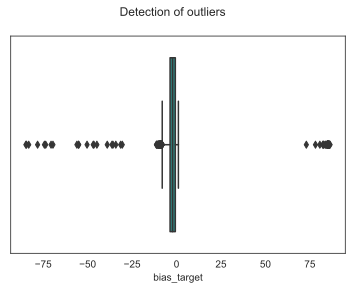

,bias_target,bias_dist,number_of_bumps,angle_separation,order,delay
1,-7.89,-3.32,2,83.72,1,0.2
5,-7.33,-3.39,2,83.72,1,0.2
10,-8.04,-3.99,2,83.72,1,0.2
12,-6.86,-4.79,2,83.72,1,0.2
13,-7.43,-4.33,2,83.72,1,0.2
18,-6.58,-3.74,2,83.72,1,0.2
24,-7.39,-3.29,2,83.72,1,0.2
29,-8.02,-3.32,2,83.72,1,0.2
30,-7.08,-4.18,2,83.72,1,0.2
38,-7.36,-3.29,2,83.72,1,0.2


In [61]:
df1 = remove_outlier_mult_columns(df, ['bias_target'])

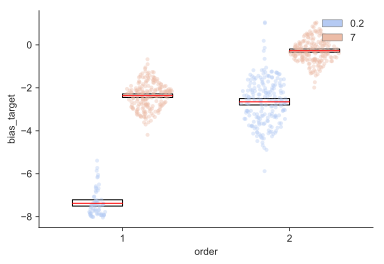

In [62]:
linares_plot(x="order", y="bias_target", df=df1, hue='delay', order=[1,2], hue_order=[0.2, 7], palette='coolwarm', point_size=4)

83.72
83.72


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


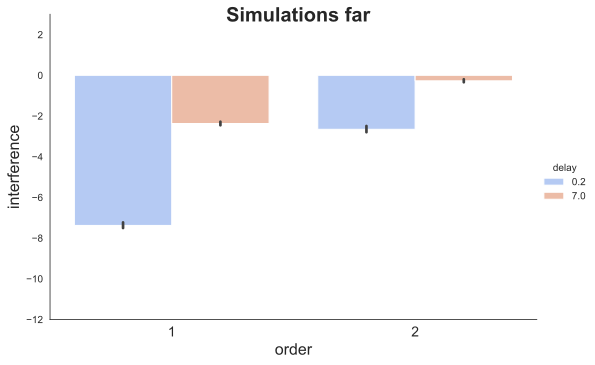

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7.839
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           3.68e-05
Time:                        17:06:32   Log-Likelihood:                -3602.1
No. Observations:                 800   AIC:                             7212.
Df Residuals:                     796   BIC:                             7231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.5346      3.565      4.638      

In [64]:
ang_sep_min =min(df.angle_separation.unique())
print(ang_sep_min)
print( round(2*np.degrees(np.pi/4.3),2))

g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df1,
                   kind='bar', palette='coolwarm', aspect=1.5)






sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim(-12, 3)

g.fig.suptitle('Simulations far', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_min]).fit()
print(result.summary())

In [3]:
df = pd.read_excel('simulations_far_3_2_93.xlsx')

120.0
120.0


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


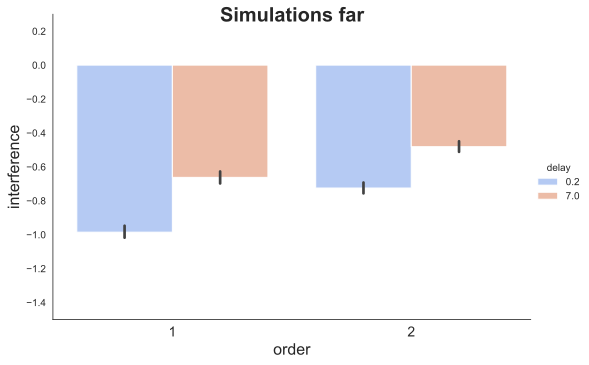

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           2.31e-87
Time:                        10:46:25   Log-Likelihood:                -3310.7
No. Observations:                4000   AIC:                             6629.
Df Residuals:                    3996   BIC:                             6655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2569      0.040    -31.162      

In [15]:
ang_sep_min =min(df.angle_separation.unique())
print(ang_sep_min)
print( round(2*np.degrees(np.pi/3),2))

g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_min],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim(-1.5, 0.3)

g.fig.suptitle('Simulations far', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_min]).fit()
print(result.summary())

In [ ]:
## 

122.87
122.87


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


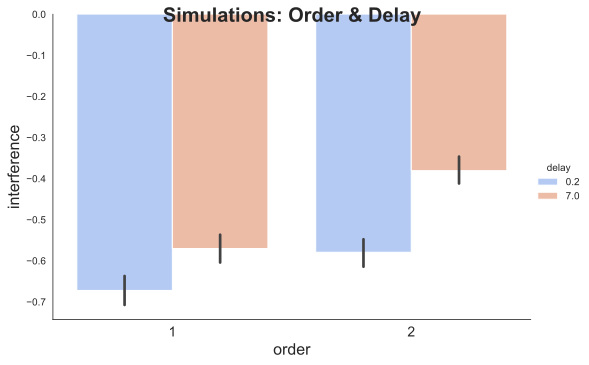

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     48.81
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           5.68e-31
Time:                        10:45:02   Log-Likelihood:                -3307.9
No. Observations:                4000   AIC:                             6624.
Df Residuals:                    3996   BIC:                             6649.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.7652      0.040    -18.985      

In [14]:
ang_sep_max =max(df.angle_separation.unique())
print(ang_sep_max)
print( round(2*np.degrees(np.pi/2.93),2))

g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_max],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_max]).fit()
print(result.summary())

In [ ]:
df = pd.read_excel('simulations_far_3_3_5.xlsx')

##### 3.5

In [24]:
#df = pd.read_excel('simulations_far_3_3_5.xlsx') (3.5)
ang_sep_min =min(df.angle_separation.unique())
ang_sep_min

102.86

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


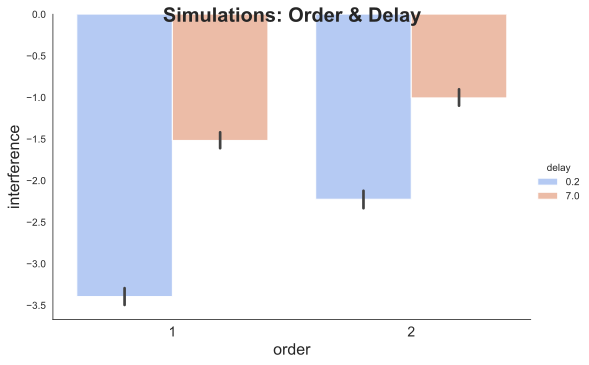

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          9.54e-116
Time:                        17:13:54   Log-Likelihood:                -313.56
No. Observations:                 400   AIC:                             635.1
Df Residuals:                     396   BIC:                             651.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.6406      0.123    -37.838      

In [25]:
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_min],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_min]).fit()
print(result.summary())

In [ ]:
### Order and angle with distance
## angle delay order en els far trials

### per que no funciona amb dos bumps???


1. att i repulsio en patrons similar: operen de la mateix amanera i en el mateix circuit
    
per que no 2 bumps?
2. en ordre 2 no pot ser un bump ja que la interf seria igual, necessites un decaiment
3. en order 1 els dos bumps haurien de donar el mateix efecte de delay

nomes el efecte de delay amb distractors valida un mecanisme amb facilitation tan a 1 com a 2 (no un bump).
iterf previa en el mateix circuit
necesiites facilitation per la diff de delay

##### 3

In [26]:
#df = pd.read_excel('simulations_far_3_3_5.xlsx')
ang_sep_max =max(df.angle_separation.unique())
ang_sep_max

120.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


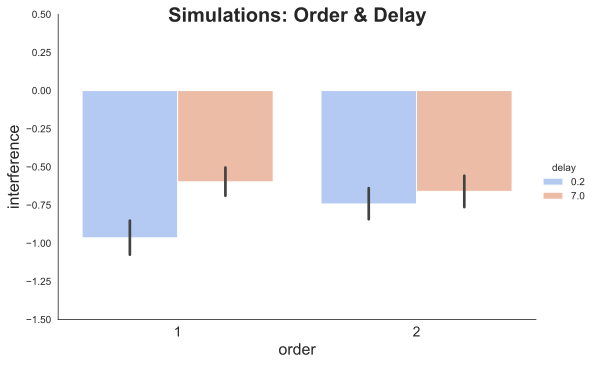

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     9.383
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           5.27e-06
Time:                        17:14:02   Log-Likelihood:                -306.75
No. Observations:                 400   AIC:                             621.5
Df Residuals:                     396   BIC:                             637.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2063      0.121    -10.005      

In [27]:
ang_sep_max =max(df.angle_separation.unique())
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_max],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_max]).fit()
print(result.summary())

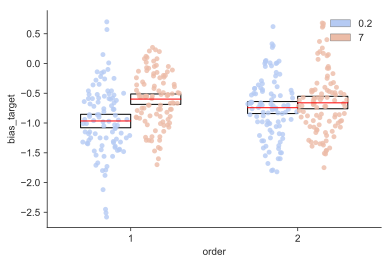

In [28]:
from linares_plot import *

linares_plot(x="order", y="bias_target", hue='delay', df=df.loc[df['angle_separation']==ang_sep_max], 
             order=[1,2], hue_order=[0.2, 7], palette='coolwarm', point_size=5, alpha=0.8)

In [3]:
df = pd.read_excel('simulations_far_2_83_2_92.xlsx')

In [4]:
df.angle_separation.unique()

array([128.57, 126.32, 124.14, 122.03])

122.03


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


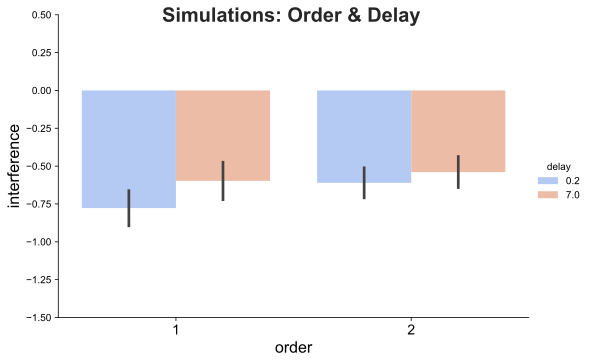

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.173
Date:                Fri, 11 Oct 2019   Prob (F-statistic):             0.0242
Time:                        11:41:53   Log-Likelihood:                -342.80
No. Observations:                 400   AIC:                             693.6
Df Residuals:                     396   BIC:                             709.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9520      0.132     -7.215      

In [6]:
ang_sep_ = 122.03
print(ang_sep_)
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_]).fit()
print(result.summary())

124.14


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


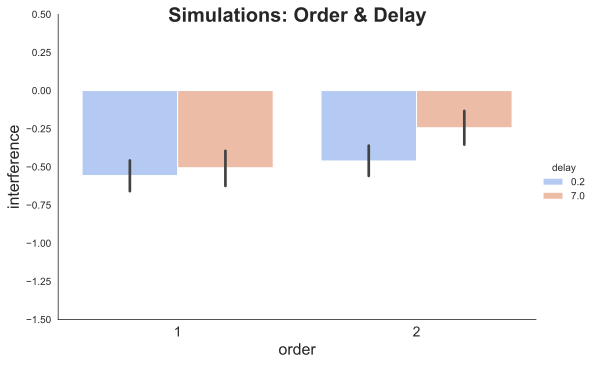

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     6.024
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           0.000509
Time:                        11:42:27   Log-Likelihood:                -334.40
No. Observations:                 400   AIC:                             676.8
Df Residuals:                     396   BIC:                             692.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6489      0.129     -5.022      

In [7]:
ang_sep_ = 124.14
print(ang_sep_)
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_]).fit()
print(result.summary())

126.32


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


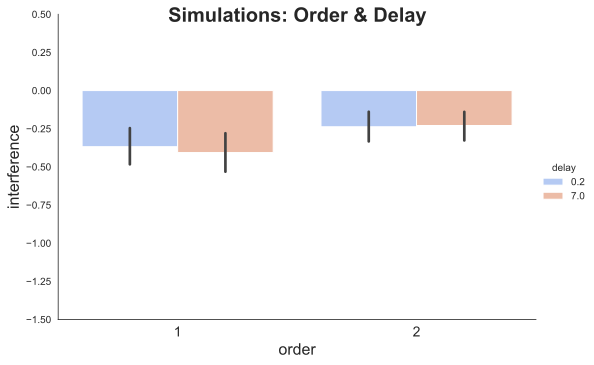

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.569
Date:                Fri, 11 Oct 2019   Prob (F-statistic):             0.0540
Time:                        11:43:08   Log-Likelihood:                -335.93
No. Observations:                 400   AIC:                             679.9
Df Residuals:                     396   BIC:                             695.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4956      0.130     -3.821      

In [8]:
ang_sep_ = 126.32
print(ang_sep_)
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_]).fit()
print(result.summary())

128.57


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


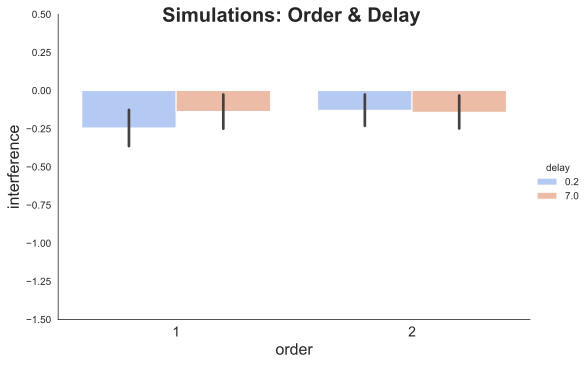

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9095
Date:                Fri, 11 Oct 2019   Prob (F-statistic):              0.436
Time:                        11:44:30   Log-Likelihood:                -341.93
No. Observations:                 400   AIC:                             691.9
Df Residuals:                     396   BIC:                             707.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3674      0.132     -2.791      

In [9]:
ang_sep_ = 128.57
print(ang_sep_)
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_]).fit()
print(result.summary())

In [29]:
df = pd.read_excel('simulations_far_2_5_2_75.xlsx')

In [37]:
2*np.degrees(pi/2.75)

130.9090909090909

In [38]:
2*np.degrees(pi/3)

119.99999999999999

##### 2.75

130.91


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


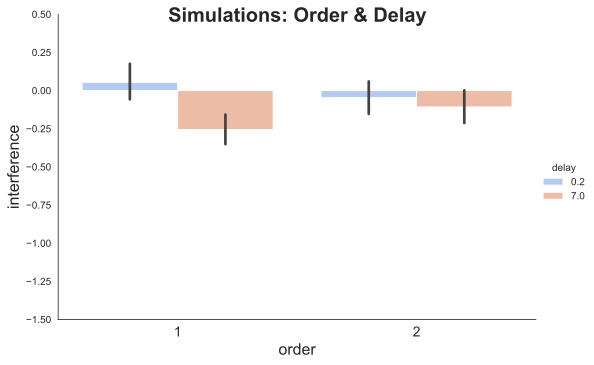

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.372
Date:                Thu, 10 Oct 2019   Prob (F-statistic):            0.00124
Time:                        17:16:15   Log-Likelihood:                -332.28
No. Observations:                 400   AIC:                             672.6
Df Residuals:                     396   BIC:                             688.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1712      0.129      1.332      

In [32]:

ang_sep_min =min(df.angle_separation.unique())
print(ang_sep_min)
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_min],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_min]).fit()
print(result.summary())

##### 2.5

144.0


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


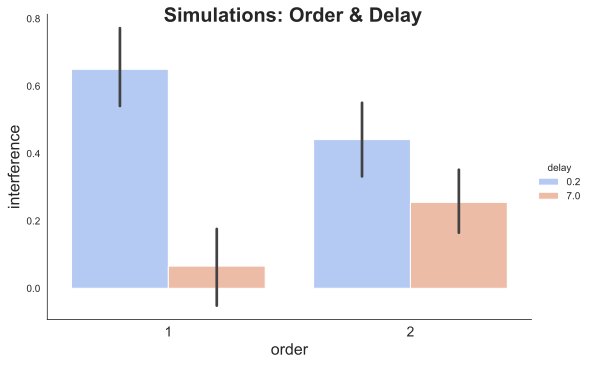

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     20.87
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.43e-12
Time:                        17:41:51   Log-Likelihood:                -324.97
No. Observations:                 400   AIC:                             657.9
Df Residuals:                     396   BIC:                             673.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8873      0.126      7.031      

In [39]:

#df = pd.read_excel('simulations_far_3_3_5.xlsx')
ang_sep_max =max(df.angle_separation.unique())
print(ang_sep_max)
g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=95, data=df.loc[df['angle_separation']==ang_sep_max],
                   kind='bar', palette='coolwarm', aspect=1.5)


sns.set_style('white')
plt.xlabel('order', fontsize=16)
plt.ylabel('interference', fontsize=16)
plt.xticks([0, 1], ['1', '2'], fontsize=14)
#plt.ylim([-1.5,0.5])

g.fig.suptitle('Simulations: Order & Delay', fontsize=20, x=0.5, weight='demibold')
plt.show(block=False)


result = smf.ols(formula="bias_target ~ delay*order", data=df.loc[df['angle_separation']==ang_sep_max]).fit()
print(result.summary())